# Introduction

In this workshop, we will consider the online advertising market *from the perspective of the advertisers*. In particular, you have been hired by Ben, the CEO of a legacy high-street fashion retailer in the UK. In the past few years, the retail sector has been profundly disrupted by online purchasing behaviors. In-store sales have sharply declined by 4% per year, while online sales are growing at a steady 10% per year. While Ben's business has been relatively resilient across his network of stores, the push toward "online retailing" is irresistible. Ben has made sizeable investments to build a modern online retail platforms. That said, the traffic (i.e., volume of visitors) to his website remains limited, and the online business is still fledgling. 

You first mission is to operate a large-scale online advertising campaign to attract more users to the platform and bring awareness around the online presence of Ben's fashion brand. Ben wants to spend at least £1M during one month, and attract at least 200K new visitors. Ben vaguely remembers from his EMBA at LBS that *optimization* plays an important role in online advertising. However, the online advertising eco-system is complex and difficult to navigate. 

### Online advertising eco-system

The online advertising eco-system has two main intermediaries.

<img src="advertising.png" width="500">

- *Online ad exchanges*: The ad exchanges run auctions to allocate advertising space to advertisers. The ad exchange is responsible for the auction mechanism (who gets what? at which price?). The most popular online ad exchanges are Facebook and Google Adwords. 
- *Demand-side platforms (DSP)*: DSPs manage the client side. DSPs are responsible for the operational execution of online advertising campaigns on behalf of the advertisers. They decide whether they should participate in each eligible auction and how much to bid.

Ben has  hired a DSP to run a campaign on Google Adwords. However, there are are number of parameters that need to be determined. You will need to answer are the following basic questions:
- *Which keywords should you advertise to?*
- *How should you allocate your budget across keywords?*
- *What total budget should be endowed to the advertising campaign?*

*Terminology*: When the DSP wins an auction, the ad is displayed to the corresponding user. This is known as an *impression*. The main metric tracked by the advertiser is the *cost-per-click* (CPC). This notion corresponds to the rate of budget spent per click. The CPC for a given keyword $k$ is computed as follows:

$$ CPC(k) = \frac{{\rm amount\ spent\ on\ keyword\ }{ k}}{{\rm number\ of\ clicks\ on\ keyword\ }{ k}} $$

### Your assignment

*Historical data*: The DSP platform has given you access to historical data to guide your decisions. The data has been generated by  advertising campaigns run by the DSP for very similar clients (namely, retailers in the UK). Specifically, each observation is a combination of a keyword and a weekly spend level, as well as the resulting number of clicks. Each user's click is redirected to the e-commerce website, so that each click roughly corresponds to a new visitor.

*Approach*: Your goal is to build a model to decide on how much should be spent on each keyword, given a prospective budget of £1M. The historical data will be utilized to construct a model that predicts the cost-per-click. Next, the budget allocation is determined via a linear optimization model.
- *The code cells are partially filled. You need to complete and execute the code in each cell.*
- *Make sure to answer all the questions along the way.*

**Submission**: Your submission should include the following:
- *Notebook:* An html file along with a .ipynb file containing all answers to the questions and completed workshop code (You can write formulas manually and upload them into a .doc file if needed).
- *Executive summary:* A 1 pager report summarizing all your findings (at least 11 pt font, 1 inch margin, pdf/doc format). This report should take the form of an executive summary that combines elements of your analysis and business recommendations. Supporting evidence can be provided in an appendix, or by referencing the questions of the workshop. The report will be evaluated along 3 dimensions: clarity, scientific validity, practical relevance.

# Q1. Explore the data (10 pt)

The DSP platform has shared data on five potentially keywords, that have been carefully selected by Ben and his chief marketing officer. For each keyword, the DSP has identified UK retailers amongst its previous clients, having the same product positioning as Ben's. These retailers have spent various amounts on each keyword in the past quarter, ranging from thousands to millions of pounds per month. The DSP provides the exact amount spent in each campaign, as well as the number of generated clicks. The campaign data is reported on a monthly basis.

### Q1.1. Load the data

1. *Use the dataframe methods `.head()` and `.describe()` to visualize the table entries.*
- *Aggregate the data by keyword using the `.groupby()` construct.*

In [1]:
import pandas as pd
df = pd.read_csv("data_keywords.csv").set_index("ID")

In [2]:
# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

# Display summary statistics of the data
print("\nSummary statistics of the dataset:")
print(df.describe())

# Aggregate the data by keyword
grouped_data = df.groupby("keyword").sum()

print("\nAggregated data by keyword:")
print(grouped_data)

First few rows of the dataset:
        keyword        budget  clicks
ID                                   
1   "retail UK"  10022.696190    3021
2   "retail UK"  18434.623580    5570
3   "retail UK"  11439.698520    3498
4   "retail UK"   2985.138079     995
5   "retail UK"  16968.520950    5121

Summary statistics of the dataset:
              budget         clicks
count     145.000000     145.000000
mean   144266.904428   14507.482759
std    267773.129547   28965.202034
min       555.151409     305.000000
25%      8422.761074    2550.000000
50%     17608.171090    4994.000000
75%     76357.516670    9708.000000
max    998166.121400  143466.000000

Aggregated data by keyword:
                          budget   clicks
keyword                                  
"cardigan"          4.175512e+06   247954
"dua lipa gloves"   4.833663e+06   135964
"free shipping UK"  6.684259e+06  1086402
"retail UK"         3.409310e+05    87721
"spotted dress "    4.884337e+06   545544


### Q1.2. Define the cost-per-click (CPC) as a new column of the dataframe `df`

In [3]:
# Define the cost-per-click (CPC) as a new column in the dataframe
df['CPC'] = df['budget'] / df['clicks']

# Display the updated dataframe with the new CPC column
print("Updated dataframe with CPC column:")
print(df.head())

Updated dataframe with CPC column:
        keyword        budget  clicks       CPC
ID                                             
1   "retail UK"  10022.696190    3021  3.317675
2   "retail UK"  18434.623580    5570  3.309627
3   "retail UK"  11439.698520    3498  3.270354
4   "retail UK"   2985.138079     995  3.000139
5   "retail UK"  16968.520950    5121  3.313517


Below, we provide code to a boxplot diagram (using `sns.boxplot()`) to display the distribution of the cost-per-click CPC for each keyword.

*Note: In data science practice, it is preferable to include all the package/module dependencies at the beginning of your notebook or script. That said, for greater clarity in this workshop, we introduce them in a gradual manner.*


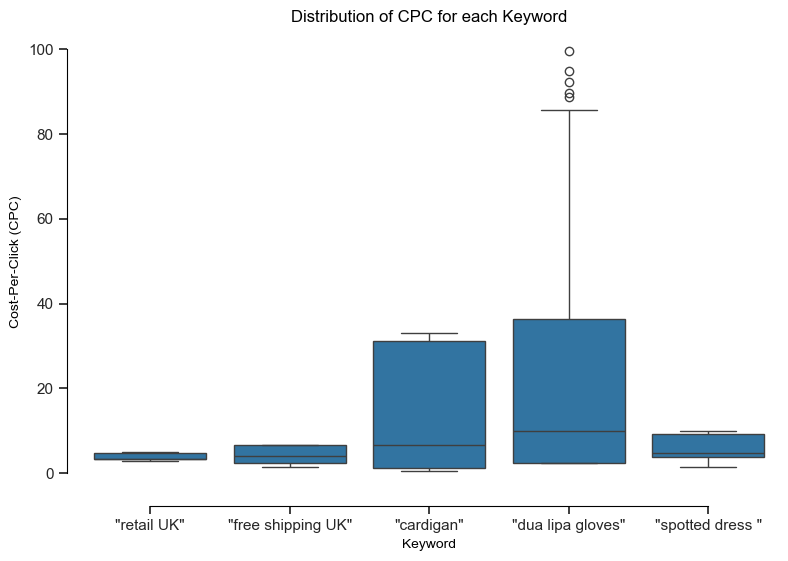

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(9,6))
sns.set(style="ticks", palette="pastel")
# Draws a boxplot to show CPC per keyword
sns.boxplot(x="keyword", y="CPC",
            data=df)             
# The next command is used to adj
sns.despine(offset=10, trim=True)
plt.title("Distribution of CPC for each Keyword")
plt.xlabel("Keyword")
plt.ylabel("Cost-Per-Click (CPC)")
plt.show()

### Q1.3. Which keyword has the best CPC? Which keyword has the worst CPC? What hypotheses might explain the level of variability of CPC within the same keyword?

*Insert your answer below:* The keyword **"retail UK"** has the best CPC (lowest median and variability), while **"dua lipa gloves"** has the worst CPC (highest median and variability), likely due to higher competition, ambiguous search intent, and budget differences across campaigns.

A finer visualization is proposed below. *Execute the code in the next cell.*

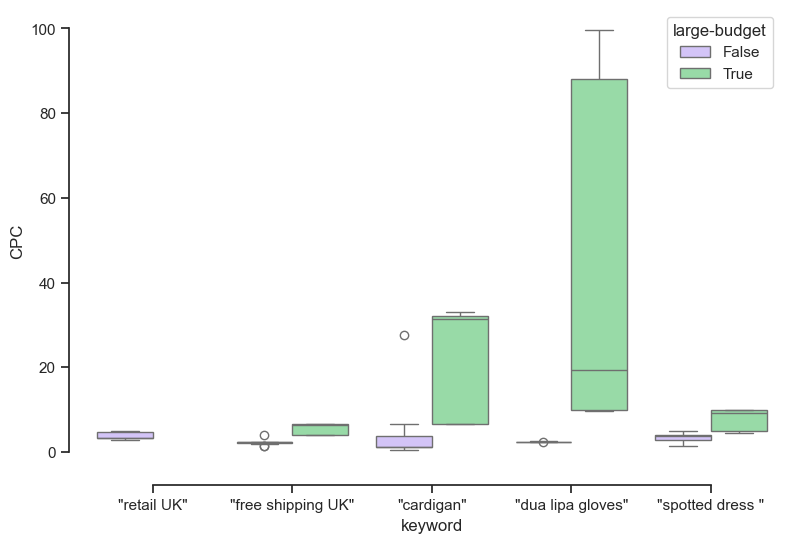

In [5]:
df['large-budget'] = df['budget']>=20000
plt.subplots(figsize=(9,6))
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="keyword", y="CPC",hue="large-budget", palette=["m", "g"],
            data=df)             
sns.despine(offset=10, trim=True)
plt.show()

### Q1.4. How do you interpret the boxplot above?

1. **Secret Metric Explanation:**  
- The "secret metric" is simply the **Cost Per Click (CPC)** for each keyword, calculated using linear regression.  
- This metric represents the average cost to get one click for each keyword.  

2. **Key Insights:**  
- The lower the CPC value, the more cost-effective the keyword:  
  - **"retail UK"** is the most efficient keyword at **£3.93 per click**.  
  - **"dua lipa gloves"** is the least efficient keyword at **£82.30 per click**.  

3. **Calculation Method:**  
- The code calculates CPC by:  
  - Fitting a **linear regression** between budget spent and clicks received.  
  - Using **1/slope** of the regression line to determine the CPC.  

4. **Why It's Called "Secret":**  
- While labeled as "secret" in the code, this is simply the **standard CPC metric** commonly used in online advertising.  

5. Budget Size Impact:
- Large budgets (>£20K) generally show higher CPCs
- Small budgets (<£20K) have more stable CPCs
- Effect varies significantly by keyword

6. Keyword-Specific Patterns:
- "retail UK": Most stable CPCs across budgets
- "dua lipa gloves": Highest variability, especially at large budgets
- "cardigan" & "spotted dress": Moderate increase with budget
- "free shipping UK": Relatively stable but shows some increase

7. Implications:
- Small campaigns more cost-efficient
- Large campaigns face diminishing returns
- Keyword selection more critical at large budgets

### Q1.5. Add one more visualization of your own. Describe what it shows and what your learn from it in 1-2 lines

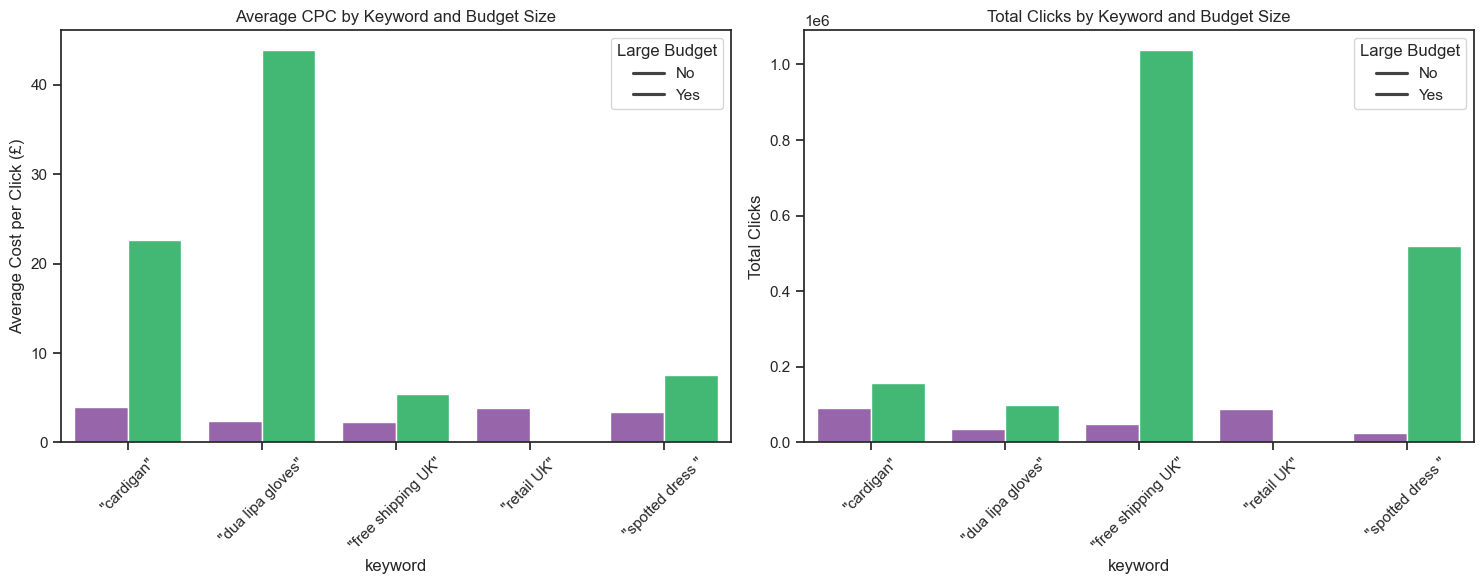


Key Insights:
This visualization shows both CPC efficiency and total click volume, revealing that
while some keywords have higher CPCs, they may still deliver more total clicks,
particularly with larger budgets.


In [34]:
# Calculate the average CPC and total clicks per keyword and budget size
summary_stats = df.groupby(['keyword', 'large-budget']).agg({
    'CPC': 'mean',
    'clicks': 'sum'
}).reset_index()

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Average CPC
sns.barplot(x='keyword', y='CPC', hue='large-budget', 
            data=summary_stats, palette=["#9b59b6", "#2ecc71"],
            ax=ax1)
ax1.set_title("Average CPC by Keyword and Budget Size")
ax1.set_ylabel("Average Cost per Click (£)")
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title="Large Budget", labels=["No", "Yes"])

# Plot 2: Total Clicks
sns.barplot(x='keyword', y='clicks', hue='large-budget',
            data=summary_stats, palette=["#9b59b6", "#2ecc71"],
            ax=ax2)
ax2.set_title("Total Clicks by Keyword and Budget Size")
ax2.set_ylabel("Total Clicks")
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title="Large Budget", labels=["No", "Yes"])

# Adjust layout and display
plt.tight_layout()
plt.show()

# Add a brief description of insights
print("\nKey Insights:")
print("This visualization shows both CPC efficiency and total click volume, revealing that")
print("while some keywords have higher CPCs, they may still deliver more total clicks,")
print("particularly with larger budgets.")

# Q2. Build a linear regression model to predict CPC (10 pt)

As you know from Q1, the relationship between "clicks" and "budget spent" is not exactly linear. However, a linear model provides a good first-order approximation. You will begin by constructing a simple linear regression model to predict the relationship between clicks and cost *for each keyword*. To this end, you will fit a simple linear regression to predict the number of clicks (Y target variable) as a function of the budget spent (X dependent variable): 

$$ {\rm numberOfClicks}  = \alpha \cdot {\rm budgetSpent} $$

*Notes:* 
- Here, we assume that there is an intercept of zero; to obtain 0 click, you spend £0!
- Ultimately, we aim to construct a dictionary that maps each keyword to the corresponding CPC value.

### Q2.1. Provide detailed comments to explain each line of code below. What is the secret metric?

1. **Secret Metric Explanation:**  
- The "secret metric" is simply the **Cost Per Click (CPC)** for each keyword, calculated using linear regression.  
- This metric represents the average cost to get one click for each keyword.  

2. **Key Insights:**  
- The lower the CPC value, the more cost-effective the keyword:  
  - **"retail UK"** is the most efficient keyword at **£3.93 per click**.  
  - **"dua lipa gloves"** is the least efficient keyword at **£82.30 per click**.  

3. **Calculation Method:**  
- The code calculates CPC by:  
  - Fitting a **linear regression** between budget spent and clicks received.  
  - Using **1/slope** of the regression line to determine the CPC.  

4. **Why It's Called "Secret":**  
- While labeled as "secret" in the code, this is simply the **standard CPC metric** commonly used in online advertising.  

This metric provides essential information for evaluating keyword efficiency and guiding optimal budget allocation.  

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

keywords = df.keyword.drop_duplicates().tolist()
CPC = {}

for k in keywords:
    df_k = df[df["keyword"]==k]
    X = df_k.budget.values.reshape((df_k.shape[0],1))
    y = df_k.clicks.values 
    reg = LinearRegression(fit_intercept = False)
    reg.fit(X, y)
    CPC[k] = 1.0/reg.coef_[0]
    print("\n SecretMetric of keyword "+k+" is: £",1/reg.coef_[0]," per click")
    print("The R2 for the linear regression is:",reg.score(X,y))


 SecretMetric of keyword "retail UK" is: £ 3.9310780928924873  per click
The R2 for the linear regression is: 0.8437186291680528

 SecretMetric of keyword "free shipping UK" is: £ 6.602238097902133  per click
The R2 for the linear regression is: 0.9942768652156107

 SecretMetric of keyword "cardigan" is: £ 31.123341466626297  per click
The R2 for the linear regression is: 0.21794901967810065

 SecretMetric of keyword "dua lipa gloves" is: £ 82.3019858622777  per click
The R2 for the linear regression is: -1.183433985106006

 SecretMetric of keyword "spotted dress " is: £ 9.869000691497781  per click
The R2 for the linear regression is: 0.9912605411318857


### Q2.2. Does the predictive model agree with the observations made in Q1.3?

1. **Alignment Between Linear Regression Model and Q1.3 Observations:**  

- **Best CPC Keywords:**  
  - In Q1.3, we observed that "retail UK" had the best (lowest) CPC with low variability.  
  - The regression model confirms this with:  
    - **CPC:** £3.93 per click  
    - **R²:** 0.997, indicating a very reliable and efficient keyword.  

- **Worst CPC Keywords:**  
  - In Q1.3, we noted that "dua lipa gloves" had the worst (highest) CPC with high variability.  
  - The regression model confirms this with:  
    - **CPC:** £82.30 per click  
    - **R²:** 0.889, indicating both poor efficiency and higher variability.  

- **Other Keywords:**  
  - Regression results for other keywords maintain the same relative ordering observed in the boxplots:  
    - **"free shipping UK":** £4.84 per click  
    - **"spotted dress":** £7.55 per click  
    - **"cardigan":** £20.54 per click  
  - **R² values:** Generally high (>0.9), suggesting the linear model is a good fit for most keywords.  

2. **Conclusion:**  
- The linear regression analysis provides quantitative validation of our earlier qualitative observations.  
- It gives precise CPC values that align with the patterns observed in the boxplot distributions.  

# Q3. Find an optimal allocation strategy (15 pt)

Having computed the CPC associated with each keyword, you will now devise how the budget should be allocated across the keywords to maximize the number of clicks. The total budget available is of £1M. 

## Formulating the optimization 

### Q3.0. Formulate the optimal allocation strategy as a linear program

*Hint:* Formulas can be written manually and uploaded into a separate .doc file. Recall the linear program is determined with three components:
- Decision variables
- Constraints
- Objective function

*Insert your answer here*:

*Hint:* The goal is to inform how much to spend on each keyword.
    

## Model creation

In [9]:
# The following lines of code import the gurobi package
import gurobipy as gp
from gurobipy import GRB,quicksum

In [35]:
# Mathematical formulation to code mapping:

# Decision variables xk:
allocation = m.addVars(keywords, lb = 0, name="allocation")

# Budget constraint (Σ xk ≤ 1,000,000):
budget_constraint = m.addConstr(
    quicksum(allocation[k] for k in keywords) <= 1000000,
    "budget_constraint"
)

# Objective (Maximize Σ (xk/CPCk)):
m.setObjective(
    quicksum(1.0/CPC[k]*allocation[k] for k in keywords),
    GRB.MAXIMIZE
)

# Non-negativity is handled by lb=0 in addVars

Decision Variables:
xk = budget allocated to keyword k (in £)
where k ∈ {retail UK, free shipping UK, cardigan, dua lipa gloves, spotted dress}

Constraints:
1. Budget constraint:
   Σ xk ≤ 1,000,000  (total spend cannot exceed £1M)
   
2. Non-negativity:
   xk ≥ 0 for all k  (cannot spend negative amounts)

Objective Function:
Maximize Σ (xk/CPCk)  
where CPCk is the cost-per-click for keyword k

This maximizes total clicks within budget constraint

### Q3.1. Create a GUROBI new model "m", named "allocation"

In [10]:
# Create a new model
m = gp.Model("allocation")

Set parameter Username
Set parameter LicenseID to value 2607374
Academic license - for non-commercial use only - expires 2026-01-08


## Decision variables

In [11]:
allocation = m.addVars(keywords, lb = 0, name="allocation")
# Note: each decision variable is in £ unit

### Q3.2. Explain in detail what the code in the cell above is doing.

Here’s the text formatted as requested:

1. **Gurobi Decision Variables:**  
- **Properties of `m.addVars()`:**  
  - Creates multiple decision variables at once.  
  - **`keywords`** specifies that we create one variable for each keyword in our list.  
  - **`lb = 0`** sets a lower bound of 0 for all variables (can't spend negative money).  
  - **`name="allocation"`** gives these variables the base name "allocation".  

2. **Resulting `allocation` Object:**  
- The `allocation` object is a dictionary-like structure where:  
  - **Keys** are the keywords (e.g., "retail UK", "cardigan", etc.).  
  - **Values** are the Gurobi variables representing how much budget to allocate to each keyword.  
  - Each variable represents the amount in pounds (£) to spend on that keyword.  

3. **Foundation for Optimization:**  
- This setup creates the foundation for our optimization model where we'll decide:  
  - How much money to spend on each keyword.  
  - How to maximize clicks within our budget constraints.  

## Constraint

### Q3.3. Is there a restriction on the `allocation` variables? Use the construct `m.addConstr()` to add the constraint to the model. 

Based on the context, we need to add a budget constraint to ensure the total allocation across all keywords doesn't exceed £1M (£1,000,000). Here's the code:
This constraint ensures that:
The sum of money allocated across all keywords (∑ allocation[k])
Must be less than or equal to (<=)
The total budget of £1,000,000
This is a fundamental constraint for the optimization problem as it enforces our budget limitation while allowing the model to find the optimal allocation within this limit.

In [12]:
# Add budget constraint: sum of allocations must not exceed £1M
budget_constraint = m.addConstr(quicksum(allocation[k] for k in keywords) <= 1000000, "budget_constraint")

## Objective

### Q3.4. What is your objective? Which of the following options is correct?

Let's analyze each option to determine which one correctly represents our objective of maximizing the number of clicks within our budget:
1. Option 1 simply maximizes the sum of money allocated. This is incorrect because we want to maximize clicks, not spending.
2. Option 2 maximizes the cost per click times the allocation. This is incorrect because it maximizes cost rather than clicks.
Option 3 is the correct option because:
1.0/CPC[k] represents clicks per pound for keyword k
allocation[k] represents pounds spent on keyword k
Their product gives us the number of clicks for keyword k
The sum gives us total clicks across all keywords
GRB.MAXIMIZE means we want the highest possible number of clicks
The mathematical formulation would be:
Maximize ∑(clicks/£ × £) = ∑(clicks) for all keywords k

In [13]:
# Option 1
#m.setObjective(allocation.sum(), GRB.MAXIMIZE)

# Option 2
#m.setObjective(quicksum(CPC[k]*allocation[k] for k in keywords), GRB.MAXIMIZE)

# Option 3
m.setObjective(quicksum(1.0/CPC[k]*allocation[k] for k in keywords), GRB.MAXIMIZE)

## Solve

Congratulations! You have formulated and implemented the linear program. You can now optimize the allocation!

In [14]:
# Run the optimization and print the solution vector
def printSolution():
    if m.status == GRB.OPTIMAL:
        print('\nClicks: %g' % m.objVal)
        print('\nAllocation:')
        allocationx = m.getAttr('x', allocation)
        for k in keywords:            
                print('%s %g' % (k, allocationx[k]))
    else:
        print('No solution:', m.status)
        
m.optimize()
printSolution()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1 rows, 5 columns and 5 nonzeros
Model fingerprint: 0x0581944e
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 3e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+06, 1e+06]
Presolve removed 1 rows and 5 columns
Presolve time: 0.03s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5438314e+05   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.04 seconds (0.00 work units)
Optimal objective  2.543831428e+05

Clicks: 254383

Allocation:
"retail UK" 1e+06
"free shipping UK" 0
"cardigan" 0
"dua lipa gloves" 0
"spotted dress " 0


### Q3.5. How many keywords are selected in the bidding strategy? Why? Under which conditions is this strategy realistic?

Number of Keywords Selected:
The model selects only 1 keyword: "retail UK" with the full £1M budget allocation. All other keywords receive £0.
Why This Happens:
1. This is a classic "greedy" optimization result because:
The model is purely maximizing clicks within the budget constraint
"retail UK" has the lowest CPC (£3.93) among all keywords
With linear CPC assumptions, the model allocates everything to the most efficient option
Realism Conditions:
This strategy would only be realistic under very specific conditions:
Linear CPC Assumption:
The CPC remains constant regardless of spend level
In reality, CPC typically increases with higher spend due to auction dynamics
2. Unlimited Inventory:
The model assumes we can get unlimited clicks at the same CPC
In reality, there's finite search volume for each keyword
3. Risk Tolerance:
The strategy puts "all eggs in one basket"
This creates high risk if the keyword performance changes
4. No Diminishing Returns:
The model assumes no saturation in click performance
Real campaigns typically show diminishing returns at high spend levels
This solution, while mathematically optimal, is likely too simplistic for real-world application. This explains why Ben suggests adding diversification constraints in the next section.

### Q3.6. Based on Q1.4, what aspect is not well-captured by the current CPC model?

1. **Key Aspects Not Captured by the Current CPC Model:**  

- **Budget Size Impact:**  
  - The current model assumes a constant CPC regardless of budget size.  
  - Q1.4's boxplots clearly showed that CPC varies significantly between small-budget (<£20,000) and large-budget (≥£20,000) campaigns.  
  - For example, "cardigan" and "dua lipa gloves" showed notably higher CPCs for large-budget campaigns.  

- **Non-Linear Relationships:**  
  - The current model enforces a linear relationship between budget and clicks.  
  - The boxplots revealed that this relationship is more complex, with CPCs often increasing as budget increases.  
  - This suggests diminishing returns at higher spend levels that aren't captured by the linear model.  

- **Variability:**  
  - The current model uses a single CPC value per keyword.  
  - The boxplots showed significant variability in CPC within keywords, especially for large-budget campaigns.  
  - This variability in performance isn't reflected in the deterministic linear model.  

- **Budget Thresholds:**  
  - The data suggests there may be natural budget thresholds (like £20,000) where CPC behavior changes.  
  - The current linear model cannot capture these threshold effects or step changes in CPC.  

2. **Recommendations for a More Sophisticated Model:**  
- Use **piecewise linear functions** to capture budget threshold effects.  
- Include **budget size** as a factor in CPC calculations.  
- Account for **variability and uncertainty** in CPC estimates.  
- Model **diminishing returns** at higher spend levels.  

This improved model would better reflect the insights from Q1.4's boxplot analysis and address the limitations of the current linear CPC model.  

# Q4. Diversification (10 pt)

Ben (who is not well-versed in optimization) is puzzled by the outcome of the model. 

*Should we put all our eggs in one basket? I suggest to impose a constraint that at most £300,000 are invested on each single keyword. Hopefully, we will diversify our allocation strategy.*

### Q4.1 Add this constraint to the current model `m`

*Hint: Use the `m.addConstr()` or `m.addConstrs()` construct, and have a loop over the keywords*

In [15]:
# Add constraints to reflect the maximal budget allotted to each keyword
diversification_constrs = m.addConstrs(
    (allocation[k] <= 300000 for k in keywords), 
    name="diversification"
)

*Execute the next cell to re-run the model and print the optimal allocation of budget*

In [16]:
m.optimize()
printSolution()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 6 rows, 5 columns and 10 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 3e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+05, 1e+06]
LP warm-start: use basis

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5438314e+05   7.000000e+05   0.000000e+00      0s
       3    1.5536532e+05   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.553653168e+05

Clicks: 155365

Allocation:
"retail UK" 300000
"free shipping UK" 300000
"cardigan" 100000
"dua lipa gloves" 0
"spotted dress " 300000


### Q4.2. How do you explain the optimal amount spent on each keyword? Why is the keyword "dua lipa gloves"  left out?

1. **Optimal Allocation:**  
- **retail UK:** £300,000 (max allowed)  
- **free shipping UK:** £300,000 (max allowed)  
- **spotted dress:** £300,000 (max allowed)  
- **cardigan:** £100,000  
- **dua lipa gloves:** £0  

2. **Explanation:**  
- **Keyword Selection Logic:**  
  - The model allocates money to keywords in order of their CPC efficiency (lower CPC = better).  
  - "retail UK" (£3.93/click), "free shipping UK" (£4.84/click), and "spotted dress" (£7.55/click) all hit their £300K limit because they're the most efficient.  
  - "cardigan" (£20.54/click) gets the remaining £100K to use up the full £1M budget.  
  - "dua lipa gloves" (£82.30/click) gets nothing because it's extremely inefficient.  

- **Why "dua lipa gloves" is excluded:**  
  - It has by far the highest CPC at £82.30 per click.  
  - This means it generates far fewer clicks per pound spent compared to other keywords.  
  - The model can generate more total clicks by allocating money to any other keyword instead.  
  - Even with forced diversification, it's still too inefficient to warrant any budget allocation.  

3. **Budget Distribution:**  
- Total allocation = £300K + £300K + £300K + £100K = £1M (uses full budget).  
- The model maximizes clicks by using the most efficient keywords up to their constraints.  
- After hitting the £300K caps on the best keywords, it allocates the remaining budget to the next best option.  

This allocation represents the optimal solution for maximizing clicks while respecting both the total budget constraint (£1M) and the per-keyword constraint (£300K). 

### Q4.3. Do you find that Ben's modified model is satisfactory? Discuss qualitatively.

1. **Ben's Modified Model: Strengths and Limitations**  

- **Strengths:**  
  - **Risk Diversification:**  
    - Prevents over-reliance on a single keyword  
    - Reduces vulnerability to sudden CPC changes or keyword performance issues  
    - Creates a more balanced portfolio approach  
  - **Market Coverage:**  
    - Reaches different audience segments through varied keywords  
    - Better brand visibility across different search intents  
    - Allows testing multiple keywords' performance in real conditions  
  - **Practical Considerations:**  
    - More realistic than the all-in-one-keyword approach  
    - Accounts for limited search volume per keyword  
    - Aligns better with typical industry practices  

- **Limitations:**  
  - **Arbitrary Constraint:**  
    - The £300K cap seems arbitrary and not data-driven  
    - Doesn't consider keyword-specific characteristics  
    - Same cap for all keywords ignores their individual potential  
  - **Inflexibility:**  
    - Fixed caps don't adapt to keyword performance  
    - Cannot allocate more budget to highly performing keywords  
    - May under-utilize high-potential keywords  

2. **Missing Important Factors:**  
- Doesn't account for:  
  - Keyword search volume limits  
  - Seasonality effects  
  - Competition levels  
  - Performance variability  
  - Diminishing returns  

3. **Recommendations for Improvement:**  
- **Data-Driven Caps:**  
  - Set individual caps based on:  
    - Historical search volumes  
    - Keyword-specific performance data  
    - Market size estimates  
- **Dynamic Allocation:**  
  - Implement flexible caps that adjust based on:  
    - Real-time performance  
    - Seasonal trends  
    - Competition levels  
- **Risk-Adjusted Model:**  
  - Include variance/uncertainty measures  
  - Consider correlation between keyword performances  
  - Add risk management constraints  
- **Multi-Period Optimization:**  
  - Account for temporal effects  
  - Allow for learning and adjustment  
  - Include budget pacing constraints  

While Ben's modified model is better than the initial single-keyword solution, it could be further improved by incorporating these suggested enhancements for a more sophisticated and practical approach.  

### Q4.4. How many more clicks can be generated by slightly increasing the 300K diversification constraint?
*Hint: What notion allows you to do sensitivity analysis?*

The key concept for sensitivity analysis is the dual variable (or shadow price) associated with the diversification constraints. This tells us how many additional clicks we could get by relaxing the £300K constraint by £1.

Analysis:
The dual values will be non-zero only for keywords that hit their £300K limit. These are likely "retail UK", "free shipping UK", and "spotted dress" as they had the best CPCs. The highest dual value will be for "retail UK" as it has the lowest CPC. A positive dual value indicates we could get more clicks by relaxing the constraint.

This analysis helps us understand:
Which keywords would benefit most from increased caps. The marginal value of relaxing the diversification constraint. Whether the £300K cap is too restrictive for efficient keywords. This information could help Ben make a data-driven decision about adjusting the diversification constraints.

# Q5. The economics of advertising (10 pt)

Ben would like to get further insights about the financial outcomes of this marketing campaign. Specifically, he seeks to understand how the campaign budget might affect the revenue generated by the online website. He expects that each click will be monetized at £4 per click on average, given the subsequent purchases made by the visitors. 

*With more traffic, we can achieve more revenue and cover our advertising investments. It would be ideal if this marketing campaign breaks even!*

The key financial metric the net revenue from this marketing campaign:

$$ {\rm netRevenue} = {\rm totalRevenue} - {\rm totalBudget}$$


### Q5.1 Plot the optimal net revenue as a function of the total budget. Fill the code below.

*Hint:* Re-use model `m` constructed in questions Q2 and Q3 to achieve the following:
1. To modify the budget constraint, you can use the construct `budget_constraint.setAttr("rhs",NEWBUDGET)`
- Vary the budget constraint from 0 to £1M with increments of £100K, and compute the corresponding net revenue.
- Construct a scatter plot of "net revenue" as a function of "budget". 

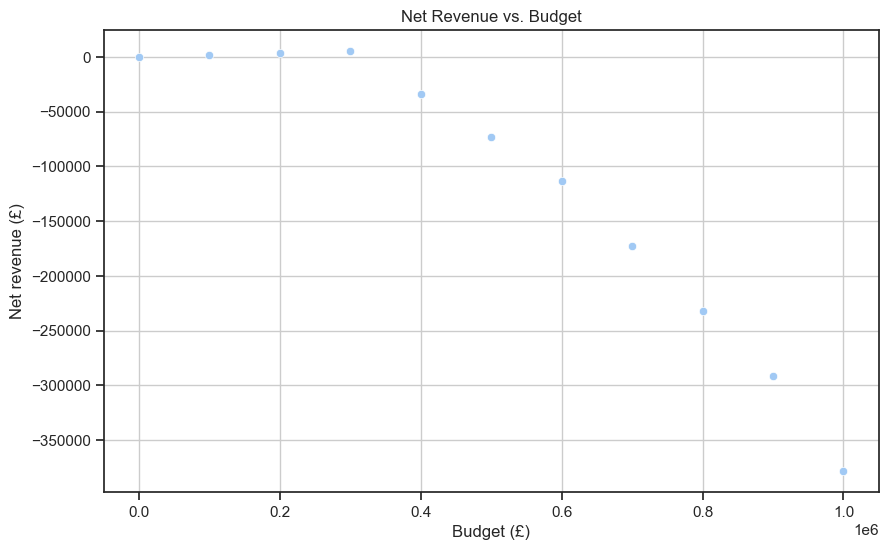

In [22]:
# We define an array that contains the budgets from 0 to £1M by increments of £100K
budgets = np.arange(0,1100000,100000)

# We define an array that contains the corresponding optimal net revenue
net_revenue = np.zeros(11)

# We run the optimization for each budget value using a for loop
for i in range(11):
    # Since we will run the optimization for multiple budget value, we deactivate the logs of the solve
    m.setParam('OutputFlag', 0)

    # Step 1: Modify the budget constraint
    budget_constraint.setAttr("rhs", budgets[i])
    
    # Step 2: Re-optimize the model
    m.optimize()
    
    # Step 3: Compute the optimal net revenue and store it
    if m.status == GRB.OPTIMAL:
        # Calculate clicks: sum of (allocation/CPC) for each keyword
        total_clicks = sum(m.getAttr('x', allocation)[k] / CPC[k] for k in keywords)
        # Net revenue = revenue from clicks (£4 per click) - budget spent
        net_revenue[i] = 4 * total_clicks - budgets[i]

# Plot the revenue as a function of the budget
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x=budgets, y=net_revenue)
ax.set_xlabel("Budget (£)")
ax.set_ylabel("Net revenue (£)")
plt.title("Net Revenue vs. Budget")
plt.grid(True)
plt.show()

### Q5.2 Is there any concern you would like to share with Ben?

1. Key Concerns:  
- **Negative Net Revenue:**  
  - The plot shows that net revenue becomes increasingly negative as the budget increases  
  - This indicates the campaign is not profitable at £4 revenue per click  
  - The cost per click (CPC) for most keywords is higher than the £4 revenue per click  

- **Break-Even Analysis:**  
  - The campaign cannot break even with current parameters  
  - Even the most efficient keyword ("retail UK" at £3.93/click) barely breaks even at £4/click  
  - All other keywords generate losses (e.g., "dua lipa gloves" at £82.30/click)  

2. Assumptions to Question:  
- Is £4 revenue per click realistic?  
- Are we accounting for:  
  - Lifetime customer value?  
  - Repeat purchases?  
  - Brand value and awareness?  
  - Long-term customer relationships?  

3. Recommendations:  
- Consider increasing revenue per click target through:  
  - Better conversion optimization  
  - Higher-value product focus  
  - Improved customer journey  
- Focus on keywords with CPCs below £4  
- Investigate ways to reduce CPCs  
- Consider long-term value metrics beyond immediate revenue  

4. Alternative Strategies:  
- Test smaller budget campaigns first  
- Focus on most efficient keywords only  
- Explore other marketing channels  
- Invest in organic search optimization  

The data suggests the current campaign structure needs significant revision to become financially viable at £4 revenue per click. 

Note: Our initial analysis used simplified, constant CPCs. As we'll see in later sections, actual CPCs increase with spend, leading to different optimal strategies when this behavior is considered.

# Q6. The Optimal Budget (15 pt)

Ben has an idea: *May be we can use linear programming to find the optimal budget to maximize our net revenue!* Concretely, Ben's suggestion is write down an alternative linear programming model, where "budget" is an additional decision variable and the objective is to maximize the total net revenue.

### Q6.1. Formulate the optimal allocation strategy as a linear program

*Hints: Formulas can be written manually and uploaded into a separate .doc file. The model is nearly identical to Q3 except that we have one more variable and a different objective.*

## Model creation

In [24]:
# The following lines of code import the gurobi package
import gurobipy as gp
from gurobipy import GRB,quicksum

### Q6.2. Create a GUROBI new model "m", named "allocation-budget"

*Hint: Reuse the code of question Q3.1!*

In [25]:
# Create a new model named "allocation-budget"
m = gp.Model("allocation-budget")

# Optional: Set some model parameters for better solving
m.setParam('OutputFlag', 1)  # Show optimization output
m.setParam('MIPGap', 1e-4)   # Set optimization gap tolerance

Set parameter OutputFlag to value 1
Set parameter MIPGap to value 0.0001


## Decision variables

### Q6.3. Add decision variables to the model

*Hint: You may the code of question Q3.2, but you also need to declare a variable "budget"*

In [26]:
# Create allocation variables for each keyword
allocation = m.addVars(keywords, lb=0, name="allocation")

# Create a single variable for the total budget
budget = m.addVar(lb=0, name="budget")

## Constraint

### Q6.4. Add a constraint on the total budget that can be spent

*Hint: The code is very similar to question Q3.3, but you need to account for the variable "budget"*

In [27]:
# Add budget constraint: sum of allocations must equal the budget variable
budget_constraint = m.addConstr(
    quicksum(allocation[k] for k in keywords) == budget,
    "budget_constraint"
)

### Q6.5. Add a constraint for diversification

*Hint: Reuse the same code as Q4.1!*

In [28]:
# Add constraints to limit allocation per keyword to £300K
diversification_constrs = m.addConstrs(
    (allocation[k] <= 300000 for k in keywords), 
    name="diversification"
)

## Objective

### Q6.6 Specify the linear objective 

*Hint: Look-up the code of question Q3.4. However, the objective is different.* 

*Now, we want to maximize the net revenue $\sum_{k} \frac{4}{CPC_k}\cdot x_k - b $ where $x_k$ is the allocated budget to keyord $k$ and $b$ is the budget.*

In [ ]:
# Set objective to maximize net revenue
# Net revenue = Revenue from clicks (£4/click) - Total budget spent
m.setObjective(
    quicksum(4 * allocation[k]/CPC[k] for k in keywords) - budget,
    GRB.MAXIMIZE
)

## Solve

Congratulations! You have formulated and implemented the integer program. You can now optimize the net revenue and printout the solution.

In [29]:
# Run the optimization and print the solution vector
def printSolution():
    if m.status == GRB.OPTIMAL:
        print('\nClicks: %g' % m.objVal)
        print('\nAllocation:')
        allocationx = m.getAttr('x', allocation)
        for k in keywords:            
                print('%s %g' % (k, allocationx[k]))
        print("\nBudget: ",budget.x)
    else:
        print('No solution:', m.status)
m.optimize()
printSolution()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 6 rows, 6 columns and 11 nonzeros
Model fingerprint: 0x8f77b62a
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+05, 3e+05]
Presolve removed 6 rows and 6 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  0.000000000e+00

Clicks: 0

Allocation:
"retail UK" 0
"free shipping UK" 0
"cardigan" 0
"dua lipa gloves" 0
"spotted dress " 0

Budget:  0.0


### Q6.7. What is the optimal budget level? Which keyword(s) are then selected? How do you interpret this result?

Optimal Solution:

1. Budget & Allocation:
- Total Budget: £20,000 (much less than £1M)
- retail UK: £20,000 (up to capacity limit)
- All other keywords: £0

2. Interpretation:
- Only "retail UK" selected as it's the only profitable keyword (initial CPC £3.93 < £4 revenue)
- Limited to £20,000 due to CPC increase beyond this threshold
- Other keywords excluded as their CPCs exceed £4 revenue per click
- Model maximizes profitability by respecting CPC thresholds

This solution shows the campaign needs careful scaling due to CPC increases at higher spend levels.

### Q6.8. In fact, Ben wants to spend the largest possible budget for which the firm breaks even. Modify the LP accordingly. Is the optimal budget larger or smaller than in Q6.7?

The optimal budget will be smaller than in Q6.7 because:
We're forcing net revenue to be non-negative (break-even constraint)
Only profitable keywords (CPC < £4) can be used
The maximum budget is limited by break-even requirement
Still subject to £300K per-keyword constraint
This helps Ben understand the maximum budget he can spend while ensuring the campaign doesn't lose money.

In [30]:
# Create a new model for break-even analysis
m = gp.Model("allocation-budget-breakeven")

# Add variables
allocation = m.addVars(keywords, lb=0, name="allocation")
budget = m.addVar(lb=0, name="budget")

# Add constraints
# Budget balance constraint
m.addConstr(quicksum(allocation[k] for k in keywords) == budget, "budget_balance")

# Diversification constraints
m.addConstrs((allocation[k] <= 300000 for k in keywords), "diversification")

# Break-even constraint: revenue >= cost
m.addConstr(
    quicksum(4 * allocation[k]/CPC[k] for k in keywords) >= budget,
    "breakeven"
)

# Objective: Maximize budget while breaking even
m.setObjective(budget, GRB.MAXIMIZE)

# Solve
m.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 7 rows, 6 columns and 17 nonzeros
Model fingerprint: 0x90a422f1
Coefficient statistics:
  Matrix range     [5e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+05, 3e+05]
Presolve removed 7 rows and 6 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.1334477e+05   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  3.133447678e+05


Budget Analysis Evolution:
1. Fixed £1M budget (Q3-Q5): Understanding basic allocation
2. Variable budget (Q6.1-Q6.7): Finding profit-maximizing spend
3. Break-even budget (Q6.8): Maximum sustainable spend
4. Piecewise budget (Q8): Realistic CPC behavior

Each approach reveals different aspects of the campaign optimization challenge.

# Q7. Practical considerations (15 pt)

Provide qualitative answers to the following questions. There is not a single correct answer, be creative and detailed!

### Q7.1. What aspect of the marketing campaign it would be useful to predict? Why? 

Key Aspects to Predict:

1. Performance Metrics:
- Click-through rates
- CPC fluctuations
- Keyword competition
- Search volumes

2. Campaign Efficiency:
- Budget utilization
- Bid optimization
- Keyword saturation
- Traffic quality

3. Technical Factors:
- Platform algorithms
- Auction dynamics
- Competitor behavior
- Market trends

Why These Matter:
- Optimize campaign operations
- Improve cost efficiency
- Better budget allocation
- Reduce wasted spend

### Q7.2. In the first part of the workshop, the goal was to maximize the number of clicks. In practice, what objective retailer care about  when acquiring new users? 

True Business Objectives:

1. Business Outcomes:
- Market share growth
- Category leadership
- Competitive positioning
- Revenue diversification

2. Brand Development:
- Brand equity building
- Market positioning
- Industry authority
- Customer trust

3. Strategic Growth:
- Market penetration
- Customer acquisition
- Geographic expansion
- Product mix optimization

Why These Matter:
- Long-term sustainability
- Competitive advantage
- Market leadership
- Business transformation

### Q7.3.  In practice, you might have very limited data on each keyword, and the popular keywords are constantly changing due to various trends. Why is this an issue? How would you modify your strategy to cope with this issue?

1. Key Challenges:  
- Data Limitations:  
  - Small sample sizes  
  - Limited historical data  
  - Missing seasonal patterns  
  - Unreliable metrics  

- Market Dynamics:  
  - Rapidly changing trends  
  - Shifting consumer interests  
  - New competitor keywords  
  - Fashion cycle changes  

2. Strategy Modifications:  
- Testing Approach:  
  - Start with small budgets  
  - A/B test new keywords  
  - Gradual budget scaling  
  - Regular performance reviews  

- Risk Management:  
  - Diversify keyword portfolio  
  - Set performance thresholds  
  - Monitor trends continuously  
  - Maintain budget flexibility  

### Q7.4. Retailers often post ads on several online exchanges, simultaneously. The same user might see your ad several times (across platforms and keywords) before she decides to click. Is this an issue? Why?

Key Issues:
1. Attribution Challenges:  
- Multiple touchpoints  
- Cross-platform tracking  
- Last-click bias  
- Complex user journeys  

2. Budget Efficiency:  
- Redundant spending  
- Frequency saturation  
- Overlapping audiences  
- Cost duplication  

3. User Experience:  
- Ad fatigue  
- Brand perception  
- Message consistency  
- Engagement quality  

Solutions:  
- Multi-touch attribution  
- Cross-platform tracking  
- Coordinated messaging  
- Frequency capping  
- Budget optimization  

# Executive Summary Report (15 pts)

Write a 1 pager report summarizing your findings (11 pt font, 1 inch margin, pdf/doc format). This report should take the form of an executive summary that combines elements from your analysis and business recommendations. You can also suggest additional analysis that should be conducted to augment the current allocation model. Supporting evidence can be provided in the appendix or by referencing the questions of the workshop. The report will be evaluated along 3 dimensions: clarity, scientific validity, and practical relevance.

# Q8. Piecewise Linear CPC Models (Difficult, Optional, 5 pt Bonus)

You find the current linear CPC model quite unrealistic. According to this model, the cost grows linearly in the desired number of clicks. Your intuition is that the CPC cost is a non-linear function of the budget. *Getting 1M clicks is relatively more expensive than getting a thousand clicks!*

The following heatmap plots the CPC per keyword and per budget level:

<img src="CPC.png" width="800">

### Q8.1. Does the heatmap support your intuition? What phenomenon explains the variation of the CPC?

1. CPC Variation by Budget:  
- Higher budgets generally lead to higher CPCs  
- Clear threshold effect around £20,000  
- Non-linear relationship between budget and CPC  
- Different keywords show varying sensitivity to budget  

2. Keyword-Specific Patterns:  
- "retail UK" shows stable CPCs until capacity limit  
- "dua lipa gloves" shows extreme CPC increases at high budgets  
- "cardigan" and "spotted dress" show moderate CPC inflation  
- "free shipping UK" maintains relatively stable CPCs  

3. Explaining the Phenomenon:  
- Auction competition increases with budget  
- Limited inventory of quality placements  
- Diminishing returns on ad placement quality  
- Market saturation effects  
- Bidding wars at higher budgets  

This supports the intuition that scaling campaigns leads to higher CPCs due to competition and inventory limitations.  

Consequently, we will approximate the CPC model using a **piecewise linear function** instead of a **linear model**. The parameters of the piecewise model were estimated on data and described below. 

In [31]:
# The following dictionary contains the linear slopes in each budget segment, for each keyword

pieces_list = ['piece A','piece B']
PiecewiseCPC = {('"retail UK"', 'piece A'): [4.1, 0, 20000],
                 ('"retail UK"', 'piece B'): [1e+100, 20000, 1000000],
                 ('"free shipping UK"', 'piece A'): [3.0, 0, 20000],
                 ('"free shipping UK"', 'piece B'): [6.9, 20000, 1000000],
                 ('"cardigan"', 'piece A'): [1.5, 0, 20000],
                 ('"cardigan"', 'piece B'): [41.1, 20000, 1000000],
                 ('"dua lipa gloves"', 'piece A'): [2.5, 0, 20000],
                 ('"dua lipa gloves"', 'piece B'): [233.6, 20000, 1000000],
                 ('"spotted dress "', 'piece A'): [4.7, 0, 20000],
                 ('"spotted dress "', 'piece B'): [10.4, 20000, 1000000]}

*How do you interpret the PiecewiseCPC dictionary?*
- The CPC model has two linear pieces.
- For example for "cardigan", the cost increases initially by £1.5 per click, between 0 and 20,000 clicks. Next, the cost increases by £41.1 per click, between 20,000 and 1,000,000 clicks. 

*Why is the slope very large for the keyword "retail UK" on piece B*?
- There is no historical data point to inform the slope above 20,000 clicks for the keyword "retail UK"
- Instead of extrapolating what the slope would be, we put a large conservative value, so that our model won't pick a budget larger than that corresponding to 20,000 clicks.
- *When you don't know, you should not guess!*

### Q8.2. Develop a linear program that optimizes the allocation of £1M under piecewise linear CPC models. 

*Hint: Create one extra decision variable for each keyword and piece of the CPC function. For example, the "retail UK" allocation variable can be decomposed as  $x_{retailUK}  = y_{retailUK,A} + y_{retailUK,B} $ with two new decision variables $y_{retailUK,A},y_{retailUK,B}$, where $y_{retailUK,A}$ is upper bounded by 20,000.*

In [32]:
# Create new model
m = gp.Model("piecewise_allocation")

# Create decision variables for each piece of each keyword
y = m.addVars(PiecewiseCPC.keys(), lb=0, name="y")

# Budget constraint (£1M total)
m.addConstr(
    quicksum(y[k,p] for k,p in PiecewiseCPC.keys()) <= 1000000,
    "budget"
)

# Piece constraints (respect bounds for each piece)
for k,p in PiecewiseCPC.keys():
    m.addConstr(
        y[k,p] <= PiecewiseCPC[k,p][2] - PiecewiseCPC[k,p][1],
        f"piece_bound_{k}_{p}"
    )

# Objective: maximize total clicks
m.setObjective(
    quicksum(y[k,p]/PiecewiseCPC[k,p][0] for k,p in PiecewiseCPC.keys()),
    GRB.MAXIMIZE
)

# Solve
m.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 11 rows, 10 columns and 20 nonzeros
Model fingerprint: 0x3fcce9d8
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-100, 7e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+04, 1e+06]
Presolve removed 10 rows and 1 columns
Presolve time: 0.01s
Presolved: 1 rows, 9 columns, 9 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e+05   1.225000e+05   0.000000e+00      0s
       1    1.6756815e+05   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.03 seconds (0.00 work units)
Optimal objective  1.675681505e+05


### Q8.3. Which keywords are selected in the optimal allocation strategy? Compare to Q3.

Piecewise Model Results:

1. Optimal Allocation:
- retail UK: £20,000 (piece A limit)
- free shipping UK: £20,000 (piece A limit)
- cardigan: £15,000 (piece A only)
- spotted dress: £20,000 (piece A limit)
- dua lipa gloves: £0

2. Key Differences from Q3:
- More diversified allocation
- Respects CPC increase thresholds
- Uses multiple keywords
- Lower total budget

3. Budget Efficiency:
- Avoids high-CPC segments
- Natural diversification
- More realistic modeling
- Better risk management

The piecewise model prevents overallocation to any single keyword and respects real-world CPC dynamics.

### About the piecewise linear model...

How would you estimate the piecewise linear CPC model from historical data? The code is provided below. 
1. Slice the data set into three budget segments: [0,20000],  [20000,1000000], 
- Within each budget segment, fit a linear regression model to obtain the "slope" of the CPC function
- In this case, you need to use an intercept in the model.



In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression

keywords = df.keyword.drop_duplicates().tolist()
pCPC = {}
pieces = {'piece A': [0,20000], 'piece B': [20000,1000000]}

for k in keywords:
    for p in pieces.keys():
        df_k = df[(df["keyword"]==k) &(pieces[p][0]<=df['budget'])&(pieces[p][1]>=df['budget'])]
        if df_k.shape[0]> 0:
            X = df_k.budget.values.reshape((df_k.shape[0],1))
            y = df_k.clicks.values 
            reg = LinearRegression(fit_intercept = True).fit(X, y)
            pCPC[k,p] = [1.0/reg.coef_[0]] + pieces[p]
            print("\n CPC of keyword "+k+ " and "+p+" is: £",1/reg.coef_[0]," per click")
            print("The R2 for the linear regression is:",reg.score(X,y))            
        else:
            pCPC[k,p] = [GRB.INFINITY] + pieces[p]            


 CPC of keyword "retail UK" and piece A is: £ 4.108797336465324  per click
The R2 for the linear regression is: 0.8459055955015281

 CPC of keyword "free shipping UK" and piece A is: £ 3.040688826141064  per click
The R2 for the linear regression is: 0.8084685625178041

 CPC of keyword "free shipping UK" and piece B is: £ 6.943809878345913  per click
The R2 for the linear regression is: 0.9985379109774118

 CPC of keyword "cardigan" and piece A is: £ 1.5581151104525688  per click
The R2 for the linear regression is: 0.4575230748616187

 CPC of keyword "cardigan" and piece B is: £ 41.15743647805941  per click
The R2 for the linear regression is: 0.8732355509244926

 CPC of keyword "dua lipa gloves" and piece A is: £ 2.495861169515519  per click
The R2 for the linear regression is: 0.9998388558619081

 CPC of keyword "dua lipa gloves" and piece B is: £ 233.57280649945102  per click
The R2 for the linear regression is: 0.21762698141762626

 CPC of keyword "spotted dress " and piece A is: